<a href="https://colab.research.google.com/github/bhargav23/EVA4/blob/master/S13/EVA_S13_YoloV3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!git clone https://github.com/bhargav23/YoloV3.git

Cloning into 'YoloV3'...
remote: Enumerating objects: 37, done.
remote: Counting objects: 100% (37/37), done.
remote: Compressing objects: 100% (34/34), done.
remote: Total 761 (delta 16), reused 0 (delta 0), pack-reused 724
Receiving objects: 100% (761/761), 26.02 MiB | 25.72 MiB/s, done.
Resolving deltas: 100% (60/60), done.


In [2]:
from google.colab import drive
drive.mount('/content/gdrive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/gdrive


In [3]:
import time
import glob
import torch
import os

from IPython.display import Image, clear_output 
print('PyTorch %s %s' % (torch.__version__, torch.cuda.get_device_properties(0) if torch.cuda.is_available() else 'CPU'))

PyTorch 1.5.0+cu101 _CudaDeviceProperties(name='Tesla P100-PCIE-16GB', major=6, minor=0, total_memory=16280MB, multi_processor_count=56)


In [4]:
ls

gdrive/  sample_data/  YoloV3/


In [5]:
cd YoloV3/

/content/YoloV3


In [6]:
ls

 annotation_tool/   __pycache__/      test.py            vim.exe.stackdump
 cfg/               README.md         ting               vin/
 data/              results.json      train_batch0.png   vout/
 detect.py          results.png       train.py           weights/
 models.py          results.txt      'ubdivisions=1'
 output/            test_batch0.png   utils/


In [8]:
!python train.py --data data/customdata/custom.data --batch 10 --cache --cfg cfg/yolov3-custom.cfg --epochs 100 --nosave

Namespace(accumulate=4, adam=False, batch_size=10, bucket='', cache_images=True, cfg='cfg/yolov3-custom.cfg', data='data/customdata/custom.data', device='', epochs=100, evolve=False, img_size=[512], multi_scale=False, name='', nosave=True, notest=False, rect=False, resume=False, single_cls=False, weights='weights/yolov3-spp-ultralytics.pt')
Using CUDA device0 _CudaDeviceProperties(name='Tesla P100-PCIE-16GB', total_memory=16280MB)

2020-05-04 12:44:38.948062: I tensorflow/stream_executor/platform/default/dso_loader.cc:44] Successfully opened dynamic library libcudart.so.10.1
Run 'tensorboard --logdir=runs' to view tensorboard at http://localhost:6006/
Model Summary: 225 layers, 6.25733e+07 parameters, 6.25733e+07 gradients
Caching labels (256 found, 0 missing, 0 empty, 0 duplicate, for 256 images): 100% 256/256 [00:00<00:00, 9838.57it/s]
Caching images (0.1GB): 100% 256/256 [00:00<00:00, 283.91it/s]
Caching labels (256 found, 0 missing, 0 empty, 0 duplicate, for 256 images): 100% 256/2

In [9]:
!python detect.py --conf-thres 0.1 --output out_out

Namespace(agnostic_nms=False, augment=False, cfg='cfg/yolov3-custom.cfg', classes=None, conf_thres=0.1, device='', fourcc='mp4v', half=False, img_size=512, iou_thres=0.6, names='data/customdata/custom.names', output='out_out', save_txt=False, source='data/customdata/images', view_img=False, weights='weights/last.pt')
Using CUDA device0 _CudaDeviceProperties(name='Tesla P100-PCIE-16GB', total_memory=16280MB)

Model Summary: 225 layers, 6.25733e+07 parameters, 6.25733e+07 gradients
image 1/274 data/customdata/images/image001.jpg: 512x512 1 SCROOZs, Done. (0.020s)
image 2/274 data/customdata/images/image002.jpg: 448x512 1 SCROOZs, Done. (0.019s)
image 3/274 data/customdata/images/image003.jpg: 320x512 1 SCROOZs, Done. (0.015s)
image 4/274 data/customdata/images/image004.jpg: 320x512 1 SCROOZs, Done. (0.015s)
image 5/274 data/customdata/images/image005.jpg: 320x512 1 SCROOZs, Done. (0.015s)
image 6/274 data/customdata/images/image006.jpg: 320x512 1 SCROOZs, Done. (0.015s)
image 7/274 data/

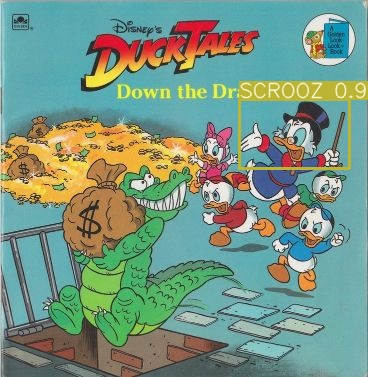

In [10]:
Image(filename='out_out/image001.jpg', width=600)

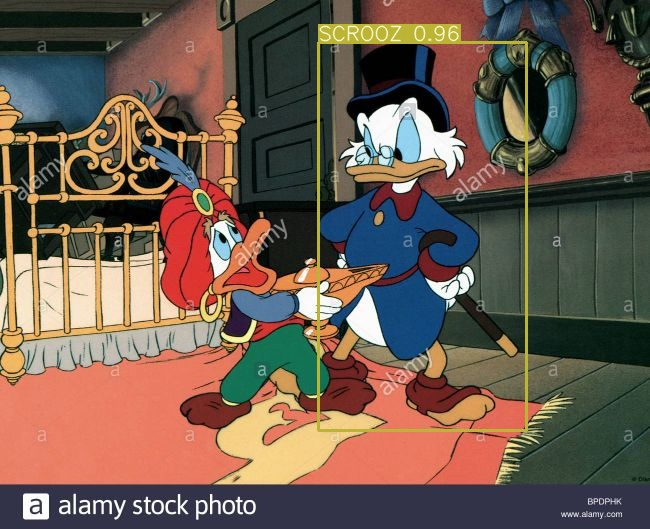

In [11]:
Image(filename='out_out/image002.jpg', width=600)

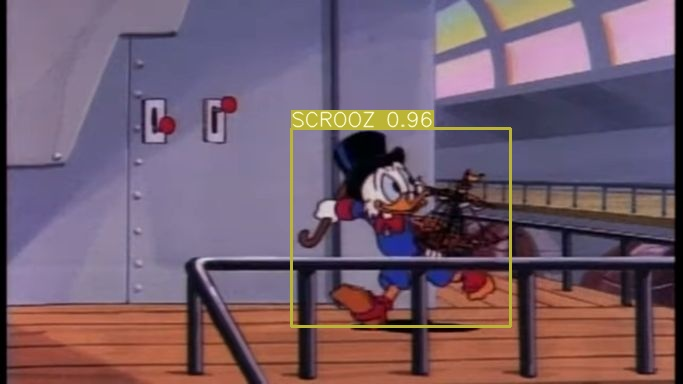

In [12]:
Image(filename='out_out/image003.jpg', width=600)

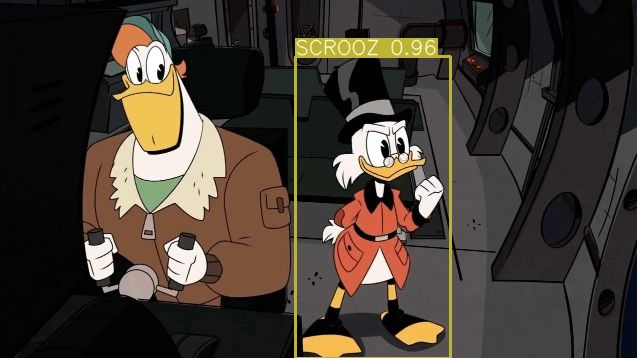

In [13]:
Image(filename='out_out/image120.jpg', width=600)

In [14]:
!pip install ffmpeg

  Created wheel for ffmpeg: filename=ffmpeg-1.4-cp36-none-any.whl size=6084 sha256=6e49a0ebd651d19238ccbb58f539ee7b0a7afa9db1c3dae2a0fcf8144e6fe3d6
  Stored in directory: /root/.cache/pip/wheels/b6/68/c3/a05a35f647ba871e5572b9bbfc0b95fd1c6637a2219f959e7a
Successfully built ffmpeg


In [15]:
cd vin

/content/YoloV3/vin


In [16]:
!ls

Scrooge.mp4  temp.txt


In [17]:
!ffmpeg -i Scrooge.mp4 image-%03d.png

ffmpeg version 3.4.6-0ubuntu0.18.04.1 Copyright (c) 2000-2019 the FFmpeg developers
  built with gcc 7 (Ubuntu 7.3.0-16ubuntu3)
  configuration: --prefix=/usr --extra-version=0ubuntu0.18.04.1 --toolchain=hardened --libdir=/usr/lib/x86_64-linux-gnu --incdir=/usr/include/x86_64-linux-gnu --enable-gpl --disable-stripping --enable-avresample --enable-avisynth --enable-gnutls --enable-ladspa --enable-libass --enable-libbluray --enable-libbs2b --enable-libcaca --enable-libcdio --enable-libflite --enable-libfontconfig --enable-libfreetype --enable-libfribidi --enable-libgme --enable-libgsm --enable-libmp3lame --enable-libmysofa --enable-libopenjpeg --enable-libopenmpt --enable-libopus --enable-libpulse --enable-librubberband --enable-librsvg --enable-libshine --enable-libsnappy --enable-libsoxr --enable-libspeex --enable-libssh --enable-libtheora --enable-libtwolame --enable-libvorbis --enable-libvpx --enable-libwavpack --enable-libwebp --enable-libx265 --enable-libxml2 --enable-libxvid --ena

In [18]:
cd ..

/content/YoloV3


In [19]:
!python detect.py --conf-thres 0.15 --source 'vin' --output 'vout'

Namespace(agnostic_nms=False, augment=False, cfg='cfg/yolov3-custom.cfg', classes=None, conf_thres=0.15, device='', fourcc='mp4v', half=False, img_size=512, iou_thres=0.6, names='data/customdata/custom.names', output='vout', save_txt=False, source='vin', view_img=False, weights='weights/last.pt')
Using CUDA device0 _CudaDeviceProperties(name='Tesla P100-PCIE-16GB', total_memory=16280MB)

Model Summary: 225 layers, 6.25733e+07 parameters, 6.25733e+07 gradients
image 1/601 vin/image-001.png: 320x512 Done. (0.016s)
image 2/601 vin/image-002.png: 320x512 Done. (0.016s)
image 3/601 vin/image-003.png: 320x512 Done. (0.016s)
image 4/601 vin/image-004.png: 320x512 Done. (0.016s)
image 5/601 vin/image-005.png: 320x512 Done. (0.016s)
image 6/601 vin/image-006.png: 320x512 Done. (0.016s)
image 7/601 vin/image-007.png: 320x512 Done. (0.016s)
image 8/601 vin/image-008.png: 320x512 1 SCROOZs, Done. (0.016s)
image 9/601 vin/image-009.png: 320x512 1 SCROOZs, Done. (0.016s)
image 10/601 vin/image-010.p

In [20]:
cd vout/

/content/YoloV3/vout


In [21]:
!ffmpeg -i image-%03d.png Scrooge.mp4

ffmpeg version 3.4.6-0ubuntu0.18.04.1 Copyright (c) 2000-2019 the FFmpeg developers
  built with gcc 7 (Ubuntu 7.3.0-16ubuntu3)
  configuration: --prefix=/usr --extra-version=0ubuntu0.18.04.1 --toolchain=hardened --libdir=/usr/lib/x86_64-linux-gnu --incdir=/usr/include/x86_64-linux-gnu --enable-gpl --disable-stripping --enable-avresample --enable-avisynth --enable-gnutls --enable-ladspa --enable-libass --enable-libbluray --enable-libbs2b --enable-libcaca --enable-libcdio --enable-libflite --enable-libfontconfig --enable-libfreetype --enable-libfribidi --enable-libgme --enable-libgsm --enable-libmp3lame --enable-libmysofa --enable-libopenjpeg --enable-libopenmpt --enable-libopus --enable-libpulse --enable-librubberband --enable-librsvg --enable-libshine --enable-libsnappy --enable-libsoxr --enable-libspeex --enable-libssh --enable-libtheora --enable-libtwolame --enable-libvorbis --enable-libvpx --enable-libwavpack --enable-libwebp --enable-libx265 --enable-libxml2 --enable-libxvid --ena

In [23]:
ls

image-001.png  image-122.png  image-243.png  image-364.png  image-485.png
image-002.png  image-123.png  image-244.png  image-365.png  image-486.png
image-003.png  image-124.png  image-245.png  image-366.png  image-487.png
image-004.png  image-125.png  image-246.png  image-367.png  image-488.png
image-005.png  image-126.png  image-247.png  image-368.png  image-489.png
image-006.png  image-127.png  image-248.png  image-369.png  image-490.png
image-007.png  image-128.png  image-249.png  image-370.png  image-491.png
image-008.png  image-129.png  image-250.png  image-371.png  image-492.png
image-009.png  image-130.png  image-251.png  image-372.png  image-493.png
image-010.png  image-131.png  image-252.png  image-373.png  image-494.png
image-011.png  image-132.png  image-253.png  image-374.png  image-495.png
image-012.png  image-133.png  image-254.png  image-375.png  image-496.png
image-013.png  image-134.png  image-255.png  image-376.png  image-497.png
image-014.png  image-135.png  image-25

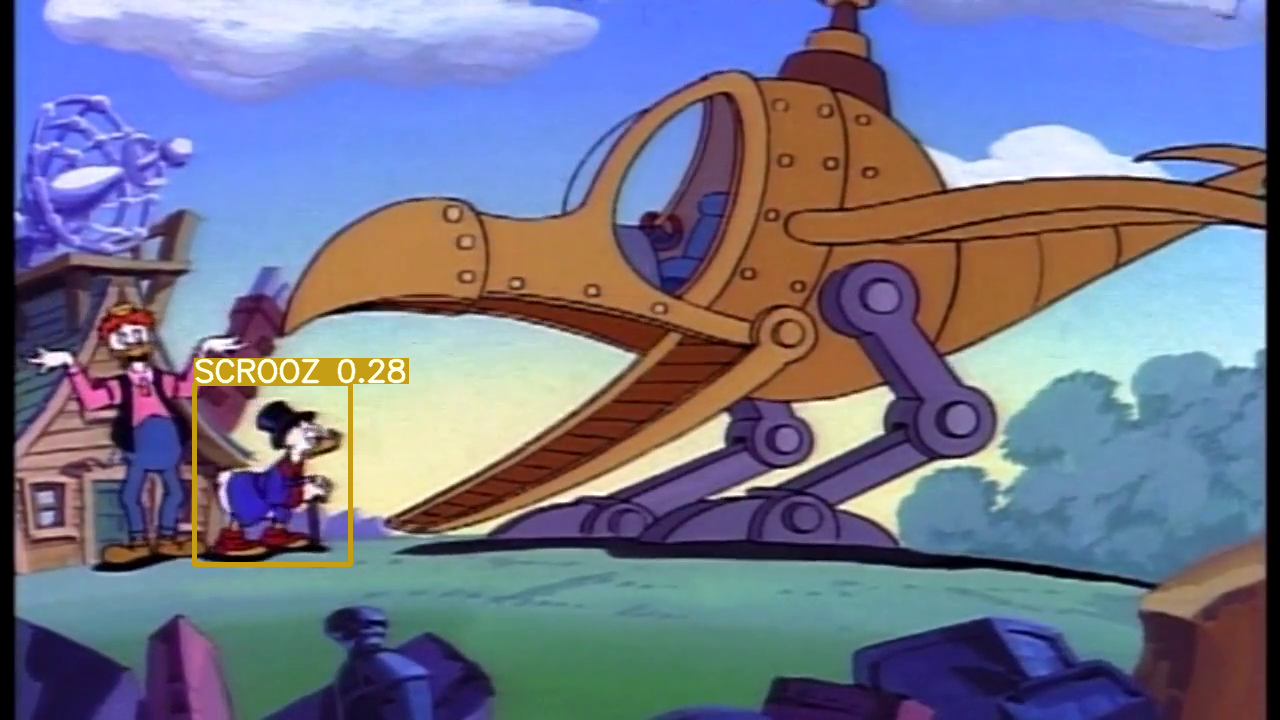

In [25]:
Image(filename='/content/YoloV3/vout/image-100.png', width=600)

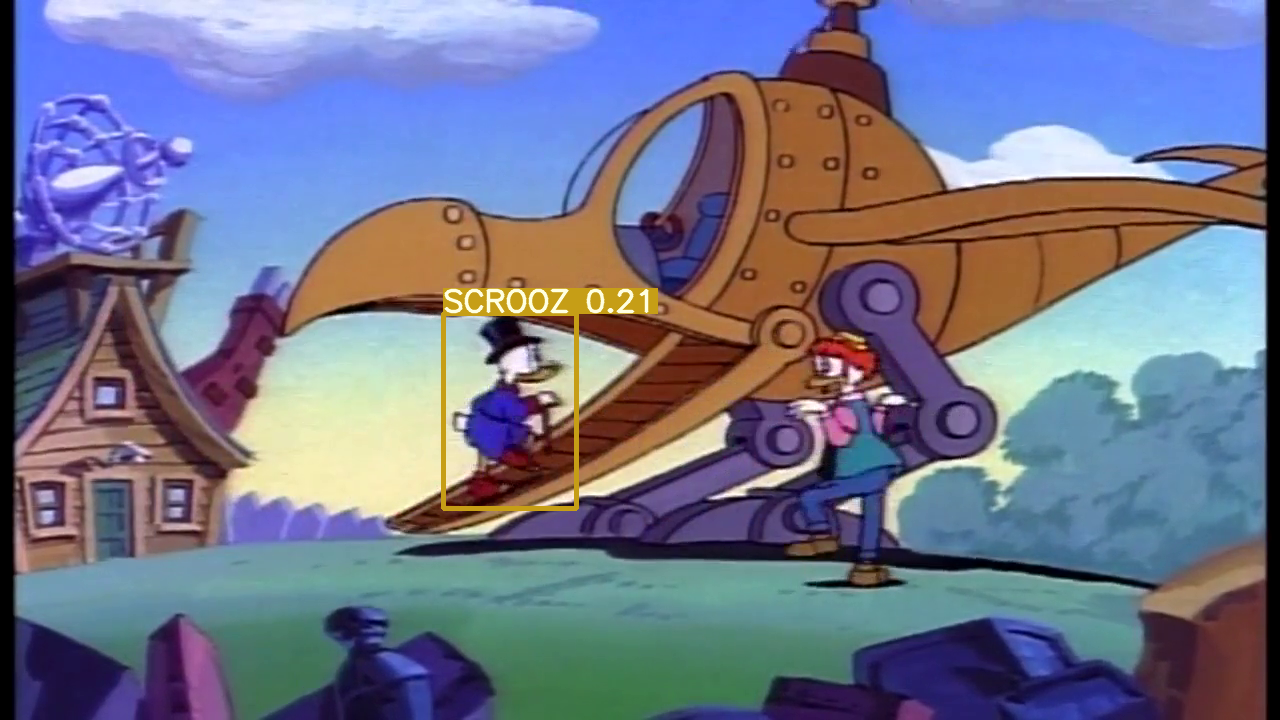

In [26]:
Image(filename='/content/YoloV3/vout/image-150.png', width=600)

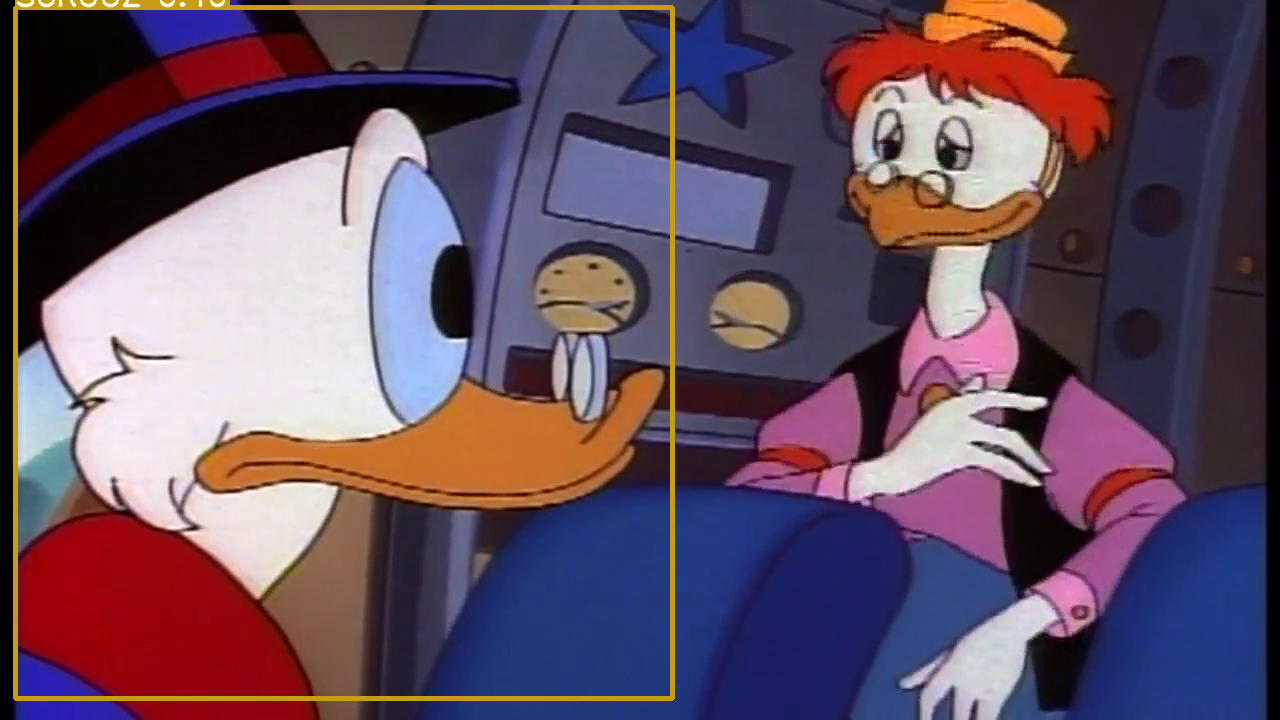

In [27]:
Image(filename='/content/YoloV3/vout/image-500.png', width=600)